# Discrete Optimal Transport
This notebook explores the calculation of optimal transport between two sets of points using discrete methods.

In [3]:
#!pip install pot ipywidgets
#!pip install ipywidgets
#!pip install jupyterlab_widgets

In [4]:
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
from utils import *
# from ipywidgets import interact, Dropdown

# Data Generation

## Loading the Data

In [7]:
# Data generation
banana_distribution = generate_data(501, 'banana')

ansur_male = process_ansur_data("../data/ANSUR II MALE Public.csv")
ansur_female = process_ansur_data("../data/ANSUR II FEMALE Public.csv")
    
# Storing in a dictionary for easy selection
datasets = {
    'Banana Distribution': banana_distribution,
    'ANSUR Male II': ansur_male,
    'ANSUR Female II': ansur_female
}

## Selection of the target distribution

In [8]:
# Prompt the user to select the target distribution
def select_dataset():
    print("Please select a distribution from the following options:")
    for i, key in enumerate(datasets.keys(), 1):
        print(f"{i}. {key}")

    choice = int(input("Enter the corresponding number: ")) - 1
    if 0 <= choice < len(datasets):
        selected = list(datasets.keys())[choice]
        print(f"Selected distribution: {selected}")
        return datasets[selected]
    else:
        print("Invalid choice.")
        return None

# Update Z
Z = select_dataset()

Please select a distribution from the following options:
1. Banana Distribution
2. ANSUR Male II
3. ANSUR Female II
Selected distribution: Banana Distribution


## Generation of the source distribution

In [14]:
z = generate_data(501, "uniform")  # Source (loi uniforme par défaut)

### Median of the source distribution

In [15]:
# Median on the 2 distinct coordinates
print(f'Empirical median (x, y): {univariate_median(z)}')

Empirical median (x, y): (0.00014410476677557366, 0.005450418408609857)


The median should be (0,0)

## Plotting the source and target distributions

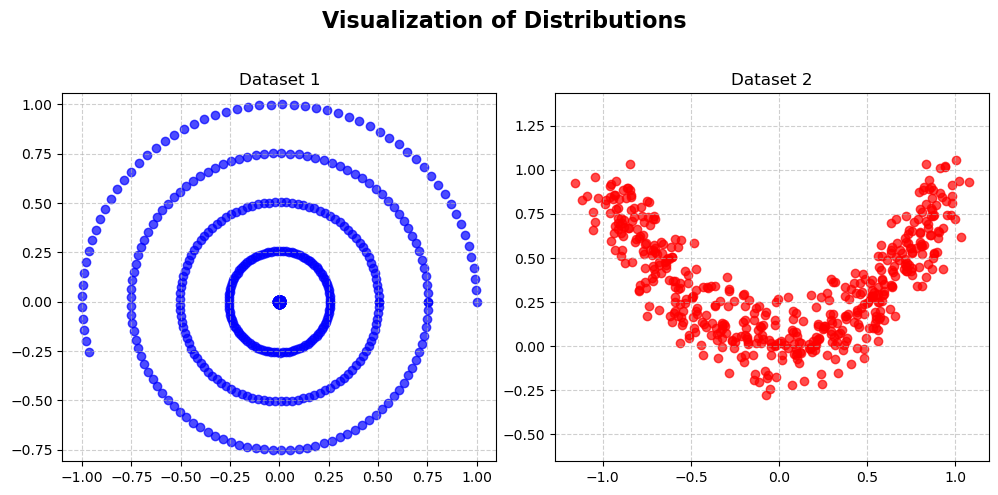

In [16]:
plot_data([z,Z])

# Optimal Transport

## Computation of Optimal Transport

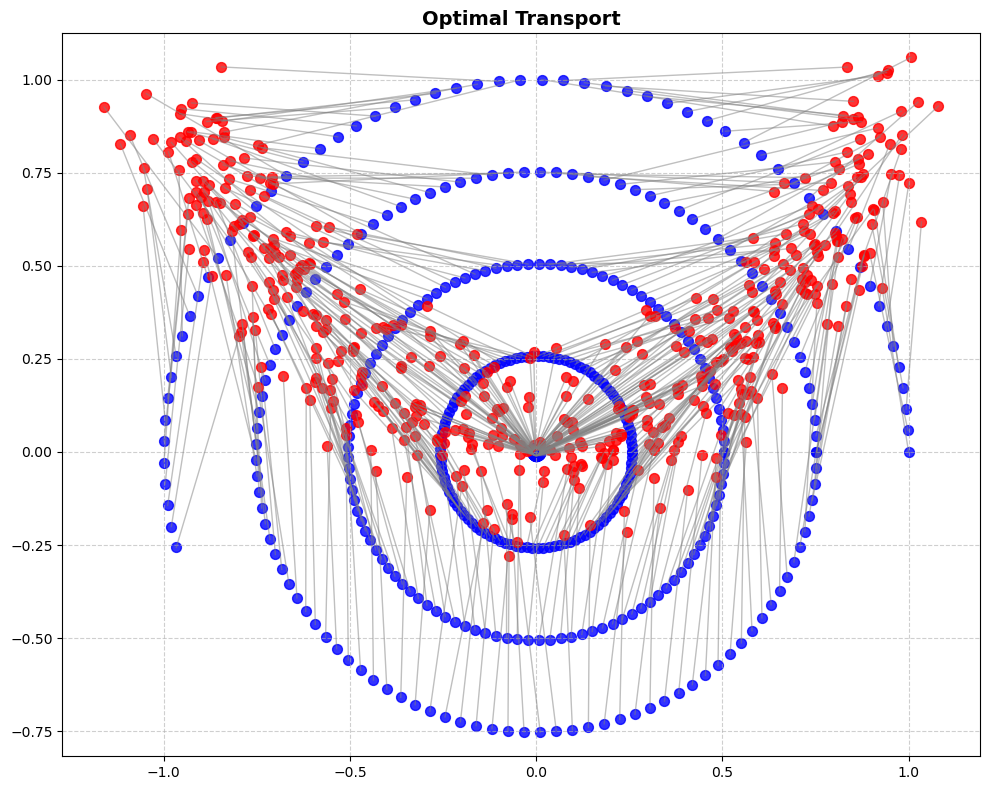

In [17]:
# Uniform weights for the distributions
a, b = np.ones(len(z)) / len(z), np.ones(len(Z)) / len(Z)

# Cost matrix (Euclidean distances between points)
M = ot.dist(z, Z)

# Solve the optimal transport problem using the EMD algorithm
gamma = ot.emd(a, b, M)

# Plot the transport plan between the source and target distributions
plot_transport(z, Z, gamma)

## Plotting quantiles 0, 0.2, and 0.6

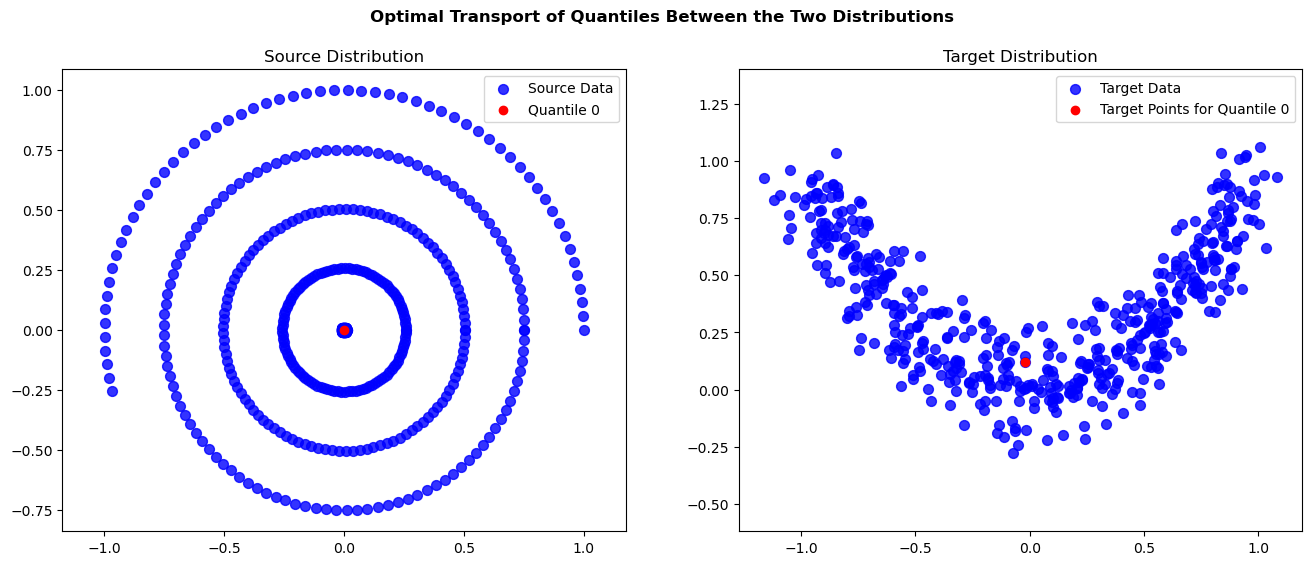

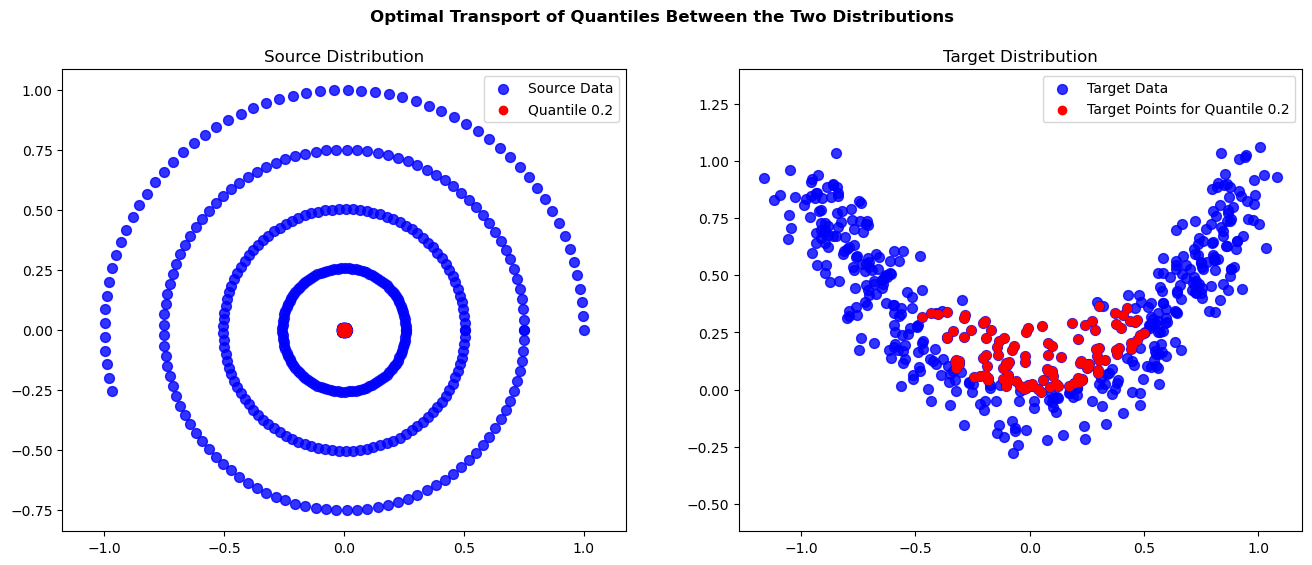

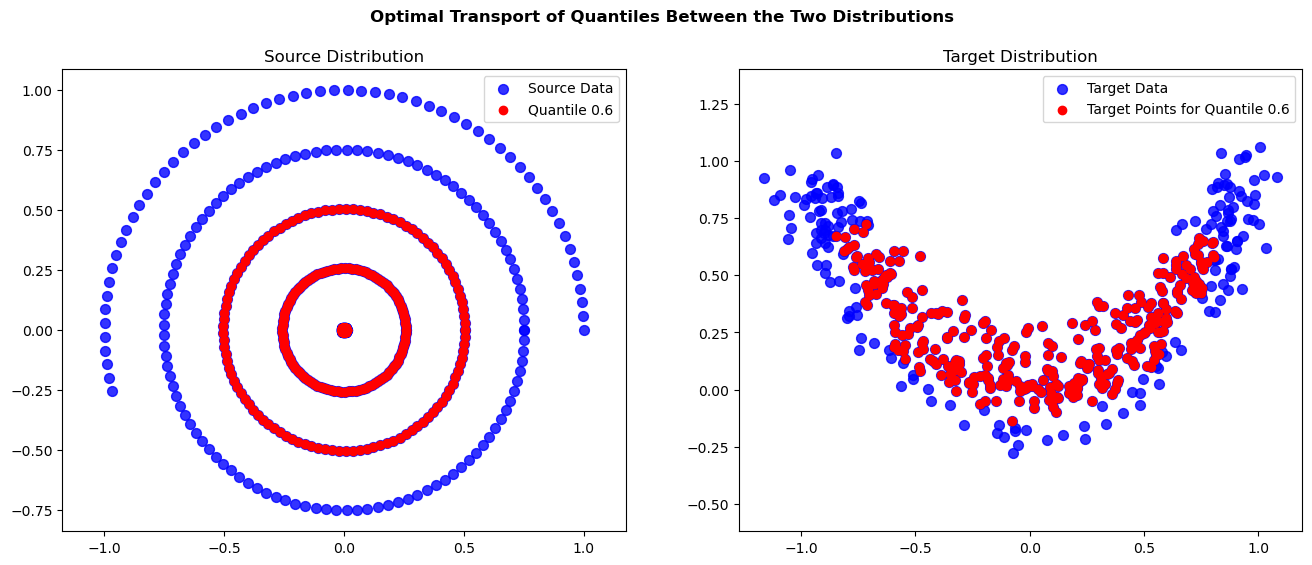

In [18]:
# Median
plot_quantile(z, Z, gamma, 0)

# Quantile 0.2
plot_quantile(z, Z, gamma, 0.2)

# Quantile 0.6
plot_quantile(z, Z, gamma, 0.6)

## Comparison of Medians

In [19]:
# Median on the 2 distinct coordinates
print(f'Empirical median (x, y): {univariate_median(Z)}')

# Median by optimal transport
print(f'Optimal transport median (x, y): {optimal_transport_median(z, Z, gamma)}')

Empirical median (x, y): (0.053934967527518474, 0.3248964763033878)
Optimal transport median (x, y): (-0.021434620793272213, 0.12112528762166062)


# Conclusion
In this notebook, we generated two sets of points, calculated the optimal transport between them, and determined the median obtained by optimal transport. The results were visualized using graphs.